# 6-1 군집 알고리즘 

이제는 고객들이 사진을 보내면 그 과일을 분류하는 것이 목적이다! 하지만 label을 모르기 때문에 어떻게 학습해야 할 지...(비지도 학습)

In [2]:
import wget

# 다운로드할 URL 및 저장할 파일 이름
url = "https://bit.ly/fruits_300_data"
output = "fruits_300_data.npy"

wget.download(url, out=output)

100% [..........................................................................] 3000128 / 3000128

'fruits_300_data.npy'

In [ ]:
저 링크가 뭘 의미하는지 모르니까 들어가보기 그럼 이제 npy라는 파일이라는 걸 알 수 있음 output 으로 파일 이름을 지정하고 다운로드 해서 파일을  
읽어오면 됨!!

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fruits = np.load('fruits_300_data.npy')

In [5]:
print(fruits.shape)

(300, 100, 100)


앞에서 부터 샘플의 개수, 이미지 높이, 이미지 너비11

In [6]:
print(fruits[0,0,:])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


숫자가 작은게 우두운 색이고 높은게 밝은색임 이게 가로줄 하나니까 사과 꼭지 부분만 겁나 밝겠죠??

 출력된 숫자들은 첫 번째 이미지의 첫 번째 행(맨 위 가로줄)의 픽셀 값을 의미함! 0: 첫번째 사진, 0:첫번째 행 : 전체! -> 가로줄

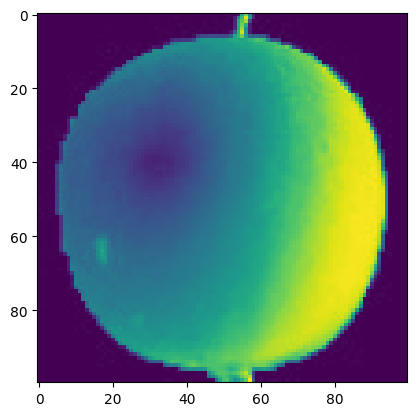

In [11]:
plt.imshow(fruits[0])
plt.show()

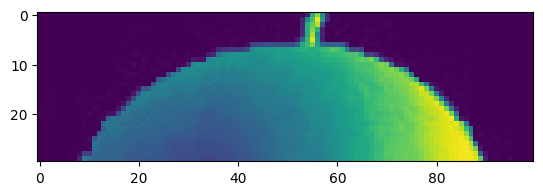

In [17]:
plt.imshow(fruits[0, 0:30, :]) 
plt.show()

줄로 잘라서 보고 싶다면?? 이렇게 하면 될듯 imshow()는 2차원을 받기때문에 0:30으로 행의 형태를 유지 시켜주면서 2차원을 만들어줘야함 

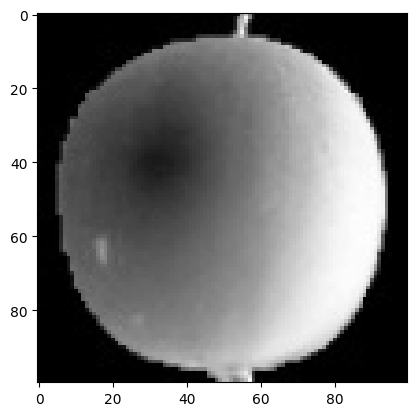

In [9]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

보통 흑백이미지는 바탕이 밝고 물체가 검증색인데, 넘파이 배열로 바꿀 때 관심대상인 사과를 돋보이게 할라고 일부러 반전 시킨 것임

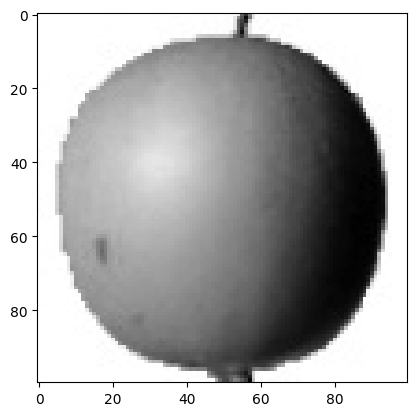

In [18]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

gray_r은 반전을 시킨거라 이제 밝은 색이 0에 가까워지는거임

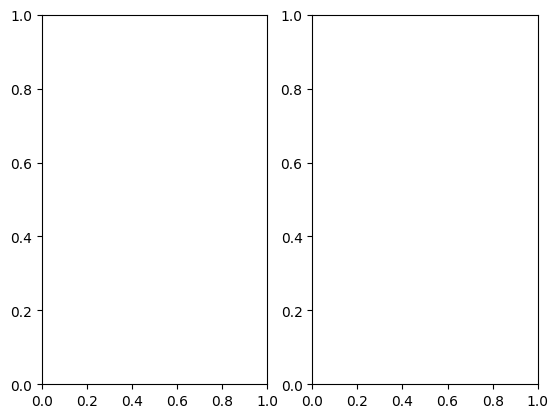

In [22]:
fig, axs = plt.subplots(1,2) #1개의 행(1), 2개의 열(2)을 가진 서브플롯(subplot) 2개를 생성하는 코드

으잉 꼭 fig, axs = plt.subplots(1,2) 이걸 같은 셀에 넣어줘야 그림이 같이 나오네..  
이유는 Matplotlib의 Figure 객체(fig)와 Axes 객체(axs)가 한 셀에서 유지되지 않기 때문

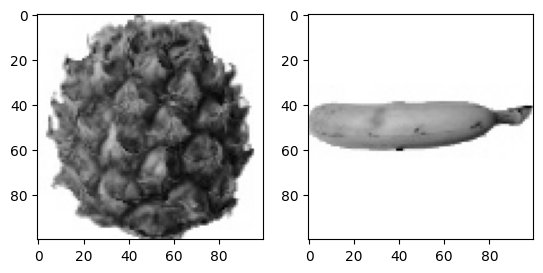

In [29]:
fig, axs = plt.subplots(1,2) #1개의 행(1), 2개의 열(2)을 가진 서브플롯(subplot) 2개를 생성하는 코드
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

 (Figure 객체) 전체 도화지 (캔버스 역할)이라 그냥 토대만 잡아준다고 생각하면됨 

In [30]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)

In [31]:
print(apple.shape)

(100, 10000)


In [34]:
print(apple.mean(axis=1).shape)
print(apple.mean(axis=1))

(100,)
[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


샘플 100개 각각에 대한 평균 값을 알아낼 수 있음!

(axis은 2차원일 때 1: 열을 따라서 0: 행을 따라서 이동

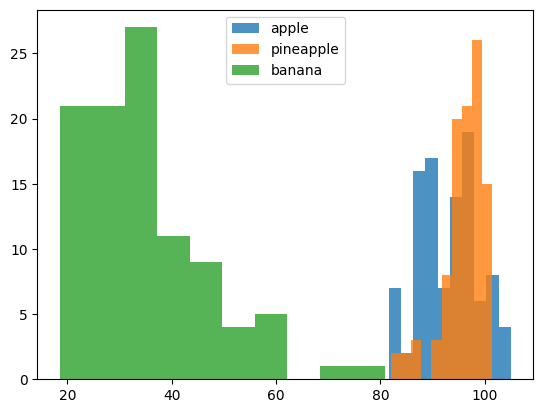

In [38]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple','pineapple','banana'])
plt.show()

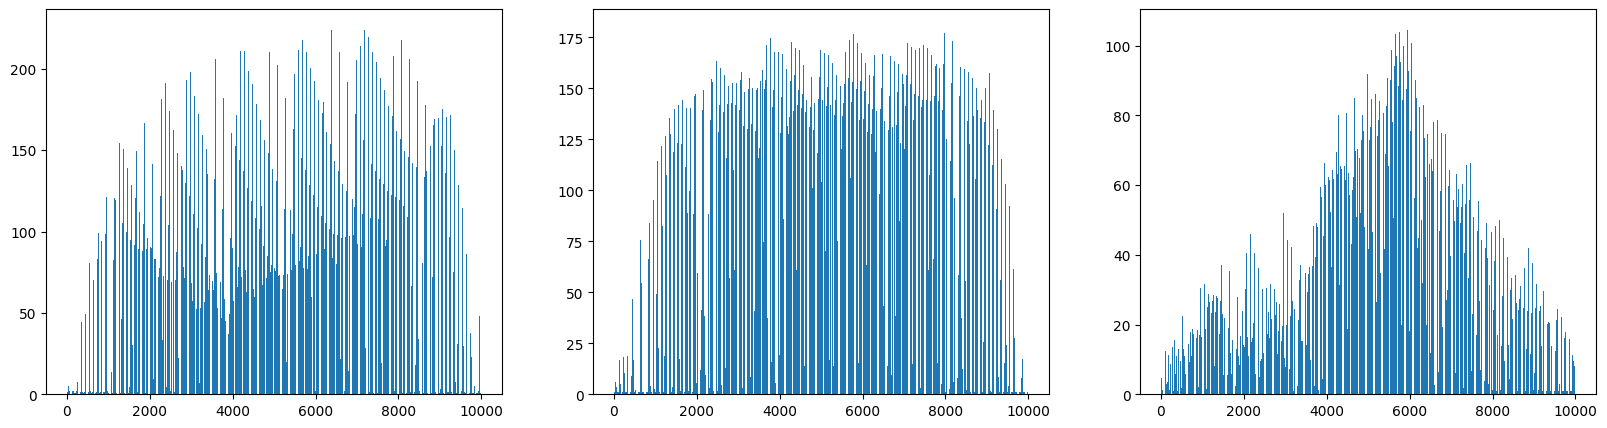

In [40]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

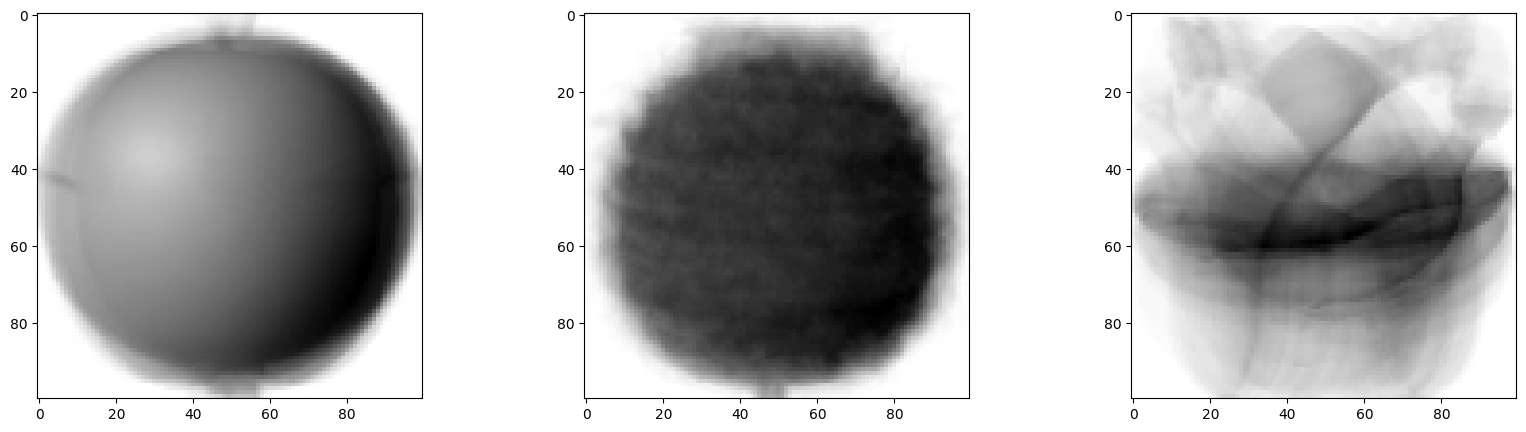

In [41]:
apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)
fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

In [42]:
abs_diff = np.abs(fruits-apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


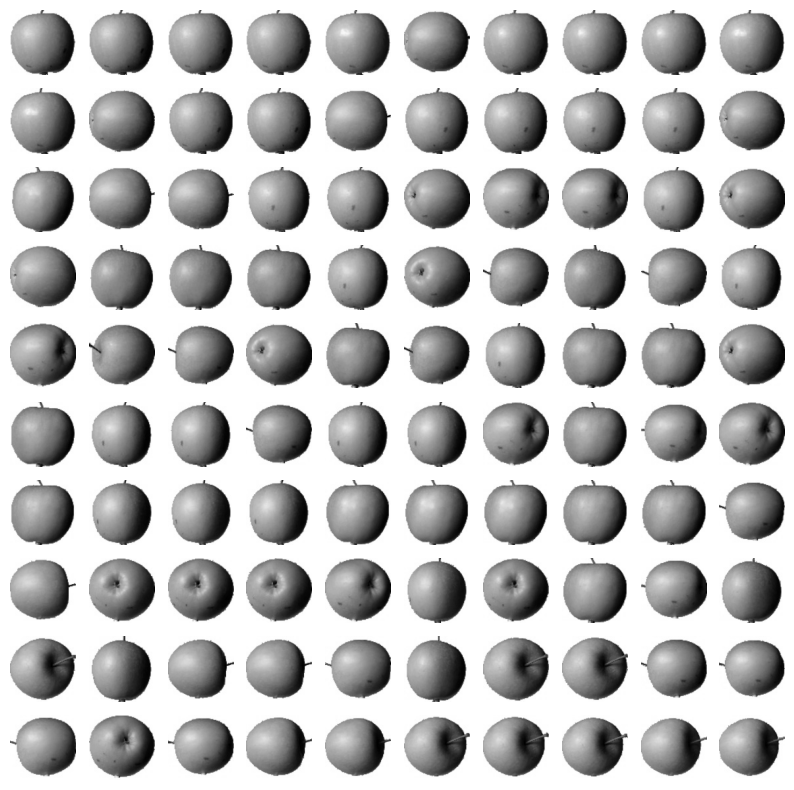

In [43]:
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10,10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i*10+j]], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

# 6-2 K-평균